In [1]:
%reload_ext autoreload
%autoreload 2

## Influence of time on the ratings

In [2]:
from src.utils.data_utils import load_time_bias_data

time_df_reviews, time_df_beerAdvocate = load_time_bias_data('data')

[nltk_data] Downloading package punkt to /home/yann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Analysis using time and rating per beer style
time_df_reviews_style = time_df_reviews.copy()
# take randomly 10 samples of style
time_df_reviews_style = time_df_reviews_style[time_df_reviews_style['style'].isin(time_df_reviews_style['style'].sample(10))]
time_df_reviews_style = time_df_reviews_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

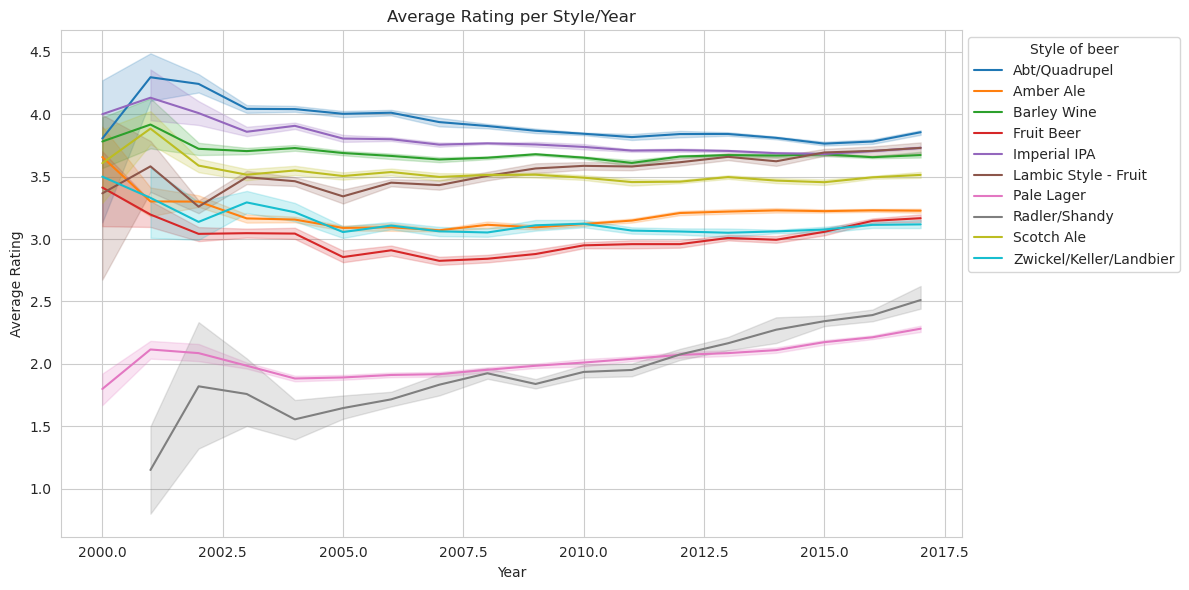

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_reviews_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

In [5]:
import statsmodels.formula.api as smf

time_df_reviews_cat = time_df_reviews.copy()
# Compute the mean of all rating to see which column affect the rating around the mean
mean = time_df_reviews_cat['rating'].mean()
time_df_reviews_cat['binary_rating'] = (time_df_reviews_cat['rating'] >= mean).astype(int)

# Check which columns will impact the most the rating
log = smf.logit(formula='binary_rating ~ year + month + day', data=time_df_reviews_cat)
log = log.fit()
print(log.summary())

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.008102
Time:                        17:14:44   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

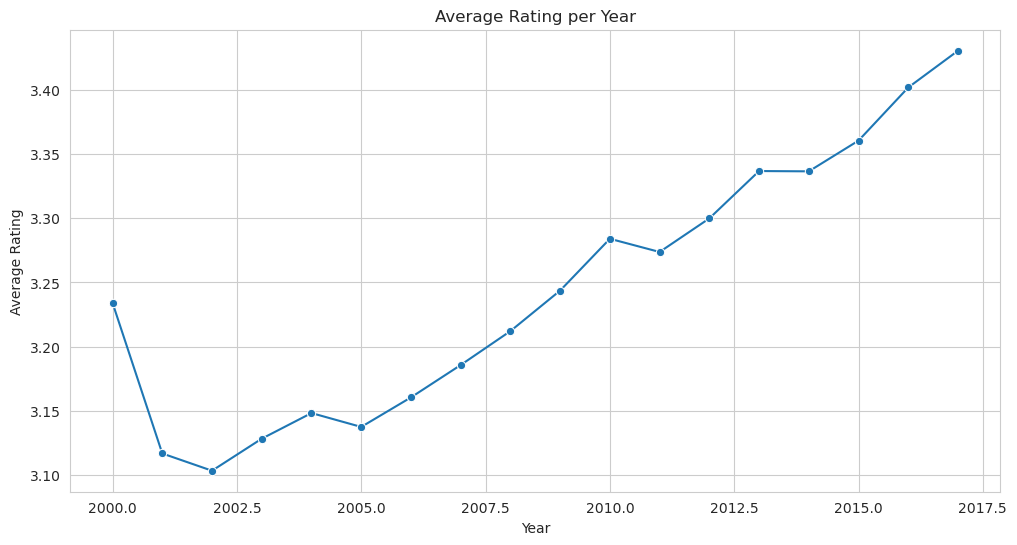

In [6]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

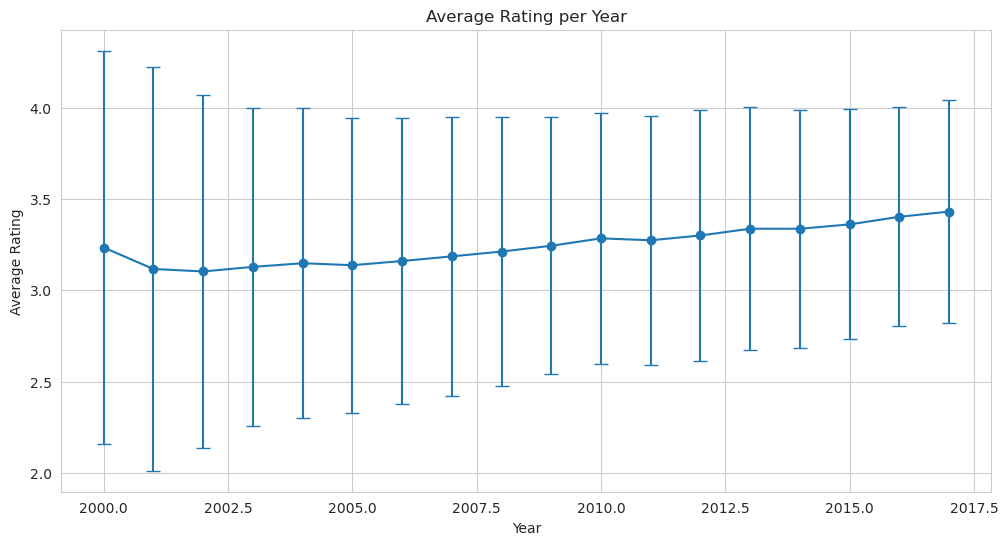

In [7]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_reviews.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_reviews.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

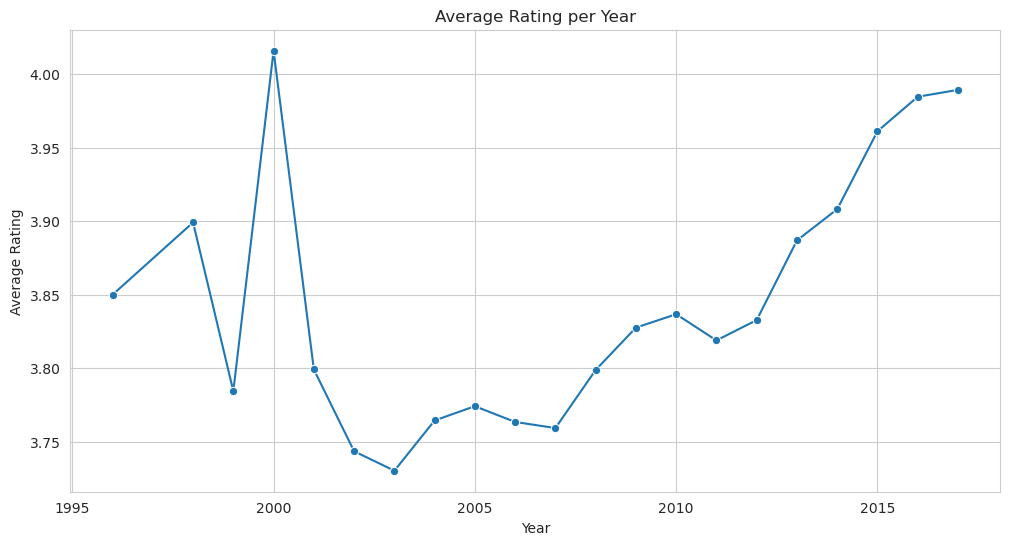

In [8]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

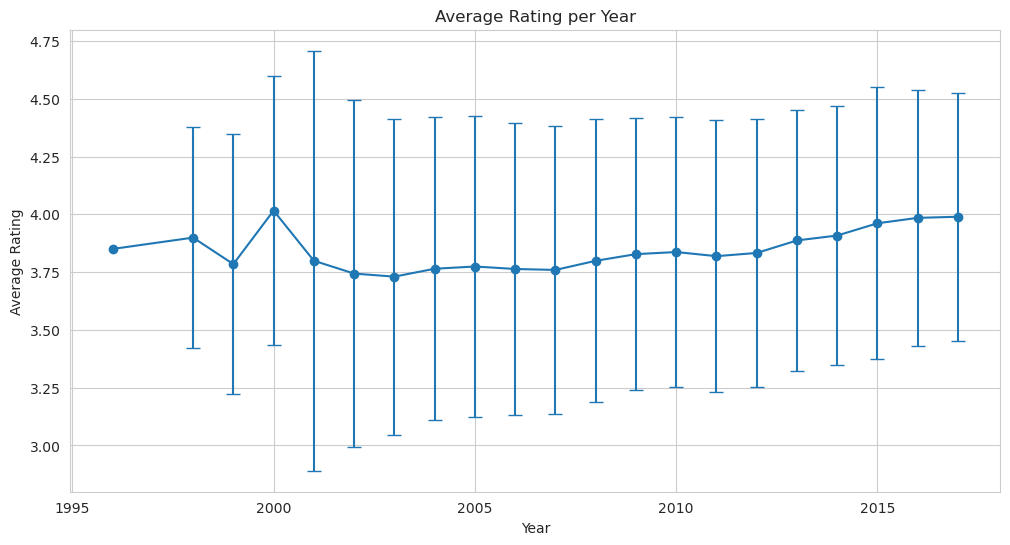

In [9]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

## Impact of initial or recents ratings

In [10]:
from src.utils.data_utils import load_data_first_rating

# load the dataset
first_vs_other_rating = load_data_first_rating()
last_vs_other_rating = load_data_first_rating(first=False)

In [11]:
# check the correlation
corr_first = first_vs_other_rating['first_rating'].corr(first_vs_other_rating['other_rating'])
corr_last = last_vs_other_rating['first_rating'].corr(last_vs_other_rating['other_rating'])
print("Correlation between th first and the others rating :", corr_first)
print("Correlation between the last and the others rating :", corr_last)

Correlation between th first and the others rating : 0.683000598567999
Correlation between the last and the others rating : 0.6372151201630049


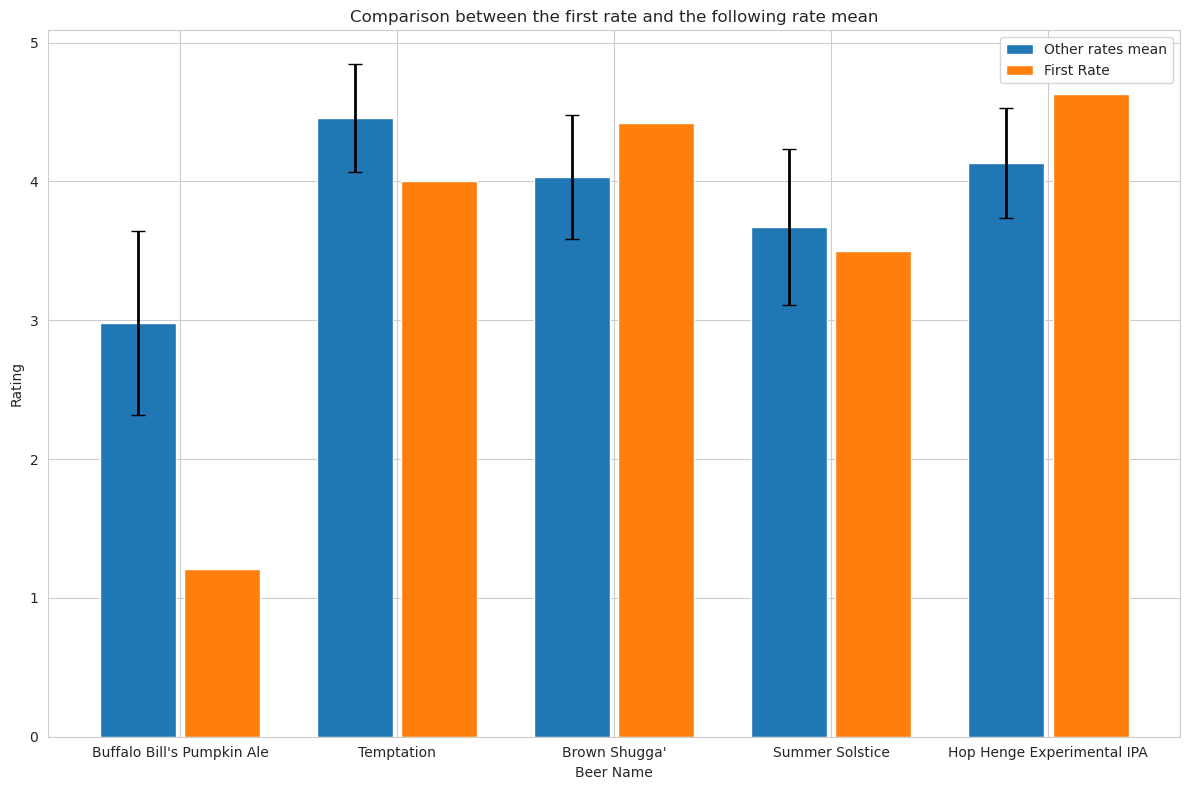

In [12]:
import numpy as np

# sample un subset to plot
hist_df = first_vs_other_rating.sample(5)

hist_labels = hist_df['beer_name']
hist_overall_means = hist_df['other_rating']
hist_first_means = hist_df['first_rating']
hist_std = hist_df['other_std']

width = 0.35
gap = 0.02
x = np.arange(len(hist_labels))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - width/2-gap, hist_overall_means, width, label='Other rates mean', yerr=hist_std, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.bar(x + width/2+gap, hist_first_means, width, label='First Rate')

ax.set_xlabel('Beer Name')
ax.set_ylabel('Rating')
ax.set_title('Comparison between the first rate and the following rate mean')
ax.set_xticks(x)
ax.set_xticklabels(hist_labels, rotation=0, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr

# perform statistical test to see if the variable are correlated

print(pearsonr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))
print(spearmanr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))

PearsonRResult(statistic=0.6830005985679989, pvalue=1.6624784090791838e-193)
SignificanceResult(statistic=0.5941634172208455, pvalue=9.632156923063058e-135)


/tmp/ipykernel_20541/1915956624.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


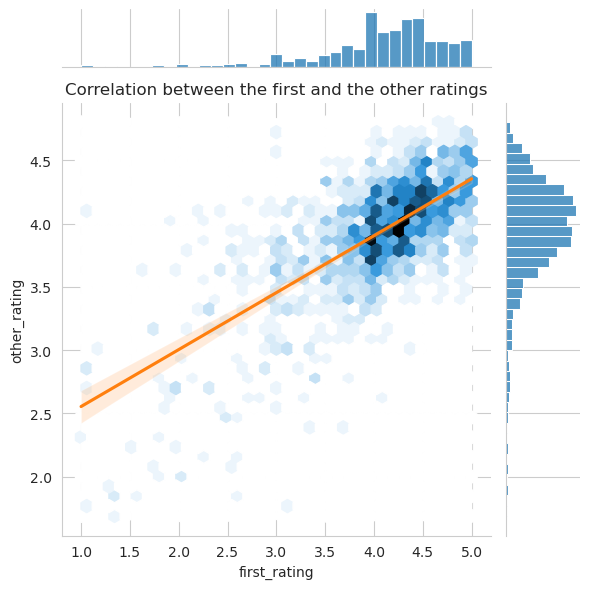

In [14]:
# On this join plot we see the correlation between first_rating and other_rating

sns.jointplot(x='first_rating', y='other_rating', data=first_vs_other_rating, kind='hex')
sns.regplot(x='first_rating', y='other_rating', data=first_vs_other_rating, scatter=False, color='#FF7F0E')
plt.title('Correlation between the first and the other ratings')

plt.tight_layout()
plt.show()

## Country biases investigation

In this part we'll try to find whether people that come from the same place as the beer (domestic raters), rate the beer higher than people who don't (international raters). We'll use the BeerAdvocate and RateBeer datasets and compare the results for both datasets. 

Let's first investigate the BeerAdvocate datset !

In [15]:
from scipy.stats import ttest_ind, pearsonr, spearmanr

import data.country_bias as cb 

We start by loading the ratings, users, breweries and beers data. We keep only relevant columns and drop every that has a nan value. 

In [16]:
df_ratings_ba, df_users_ba, df_breweries_ba, df_beers_ba = cb.load_country_data()

Keep 4,654,808 ratings out of 8,393,032 (55.46%)
Keep 122,425 users out of 153,704 (79.65%)
Keep 16,758 breweries out of 16,758 (100.00%)
Keep 5,702 beers out of 280,823 (2.03%)


Except for the beers data, we still keep a major part of the data. Now let's merge the 4 dataframes together.

In [17]:
df_merged_ba = cb.merge_country_data(df_ratings_ba, df_users_ba, df_breweries_ba, df_beers_ba)

There are 156,602 domestic ratings vs 1,388,164 international ratings


In the end we have a dataset of more than 1.5 million data which is still quite large ! However, domestic ratings are quite imbalanced as we have almost 10 times more international ratings. Now let's fit a linear model to the data to see which feature influences the user ratings.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.616e+05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:16:04   Log-Likelihood:            -1.1092e+06
No. Observations:             1544766   AIC:                         2.218e+06
Df Residuals:                 1544760   BIC:                         2.219e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

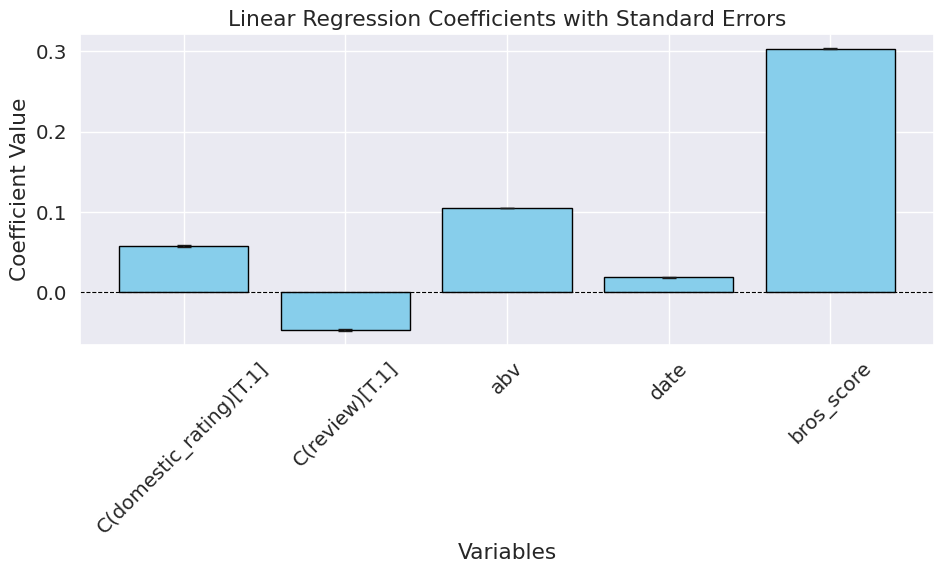

In [18]:
cb.regression_analysis(df_merged_ba)

We first notice that all coefficients are significant at level 0.05. The largest coefficient is associated with the bros_score which can mean that users are influenced by the "brothers" (BeerAdvocate site founders) ratings. Then, the ABV seems to have a large influence too. Domestic ratings also have a positive influence in the regression, so there might indeed be a location bias.

We can plot a histogram of the ratings for both domestic (treated group) and international ratings (control group) and see other basic statistics of the ratings.

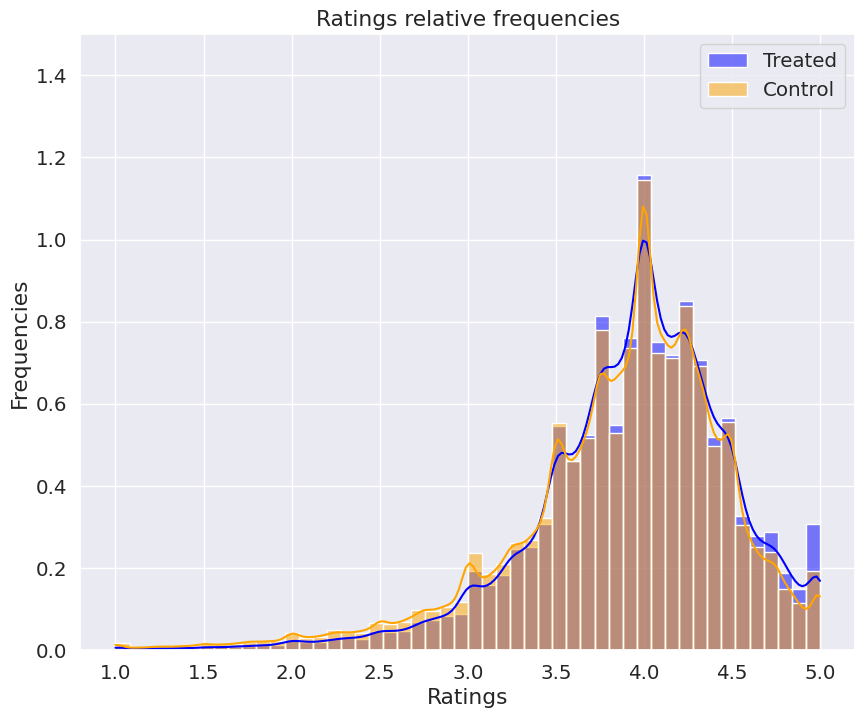

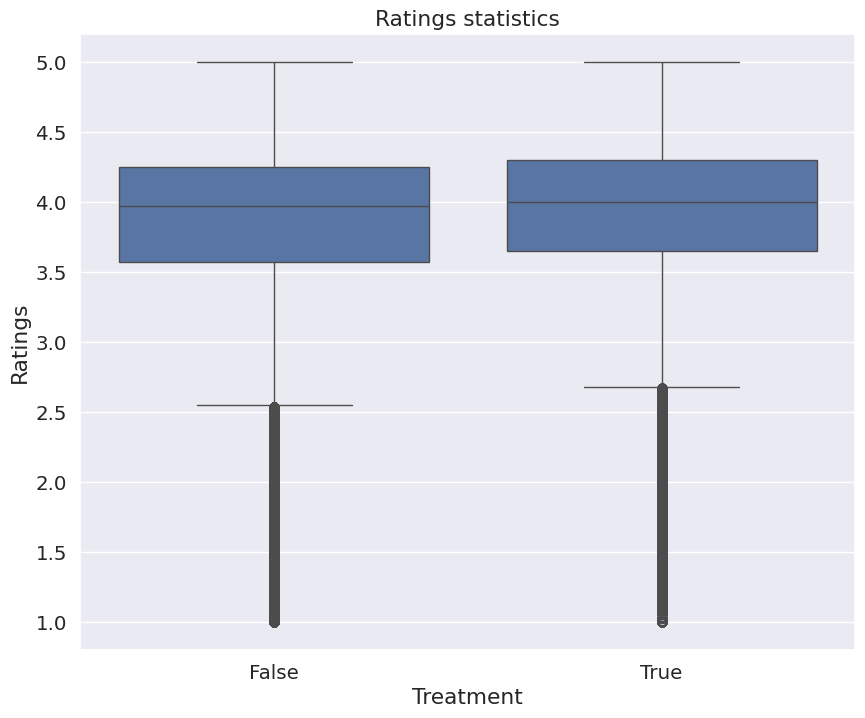

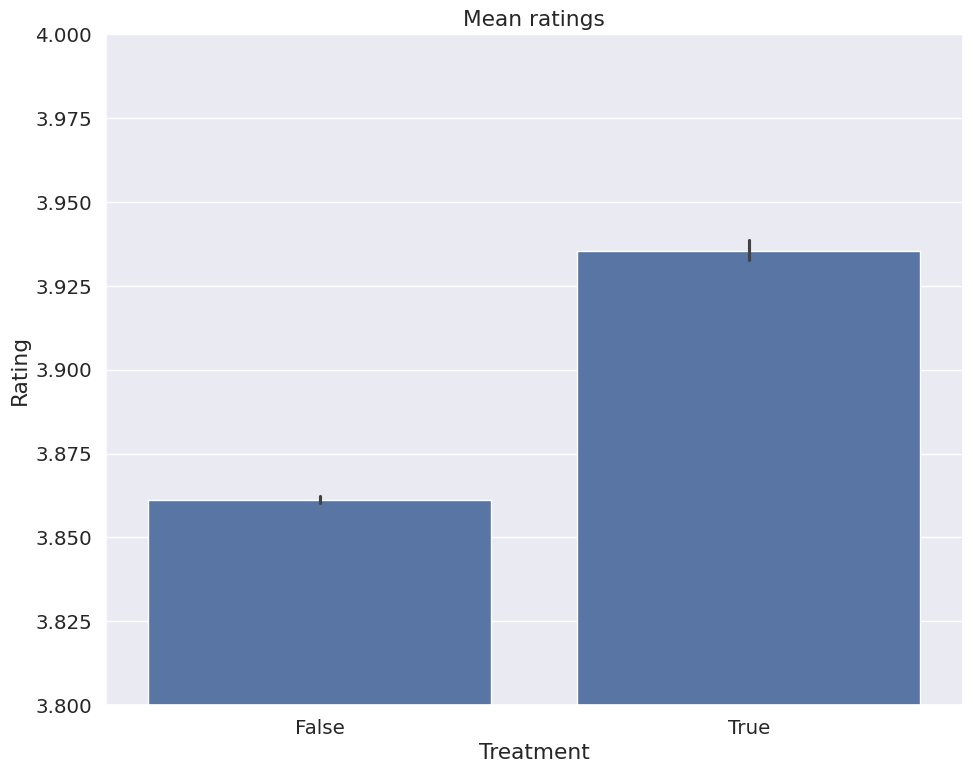

In [19]:
cb.compare_control_and_treatment(df_merged_ba)

We see a small shift to the right of the treated group in the histogram, meaning that the ratings seem to be higher for this group. We also see a higher mean and median for the treated group. However, the data might be imbalanced and as we saw before, we have way more data in the control group so the results might be biased by undetected confounders.

To try to mitigate the effect of these undetected confounders, we can do a propensity score matching (psm) on the control and treatment groups. As this can be computationally intensive, we have to heavily subsample the dataset.

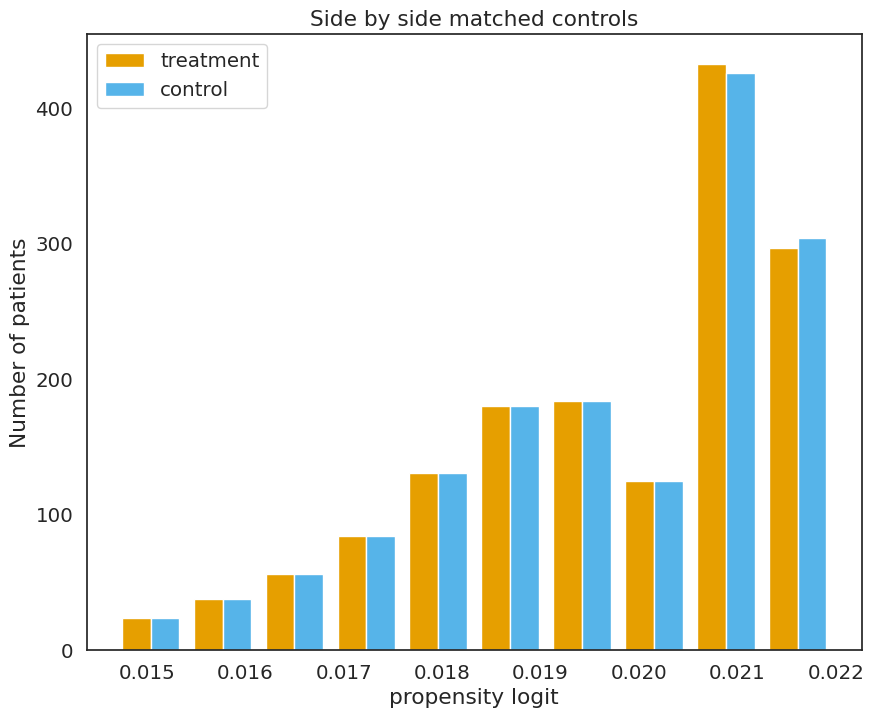

In [47]:
df_balanced_ba = cb.psm_balancing(df_merged_ba, frac_kept=1.0/100.0)

The matching seems to have balanced the data well as we can see on the plot above.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     236.7
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          1.50e-214
Time:                        17:35:02   Log-Likelihood:                -2268.6
No. Observations:                3104   AIC:                             4549.
Df Residuals:                    3098   BIC:                             4585.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

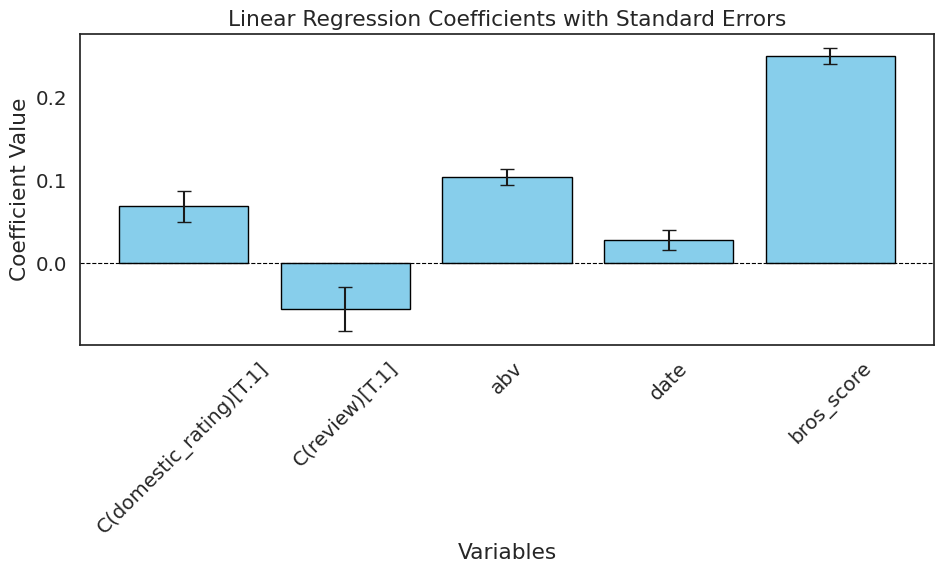

In [48]:
cb.regression_analysis(df_balanced_ba)

The results didn't change much after the matching. We have larger error bars which can be expected as we have less data. The review and date coefficients are not statistically significant now.

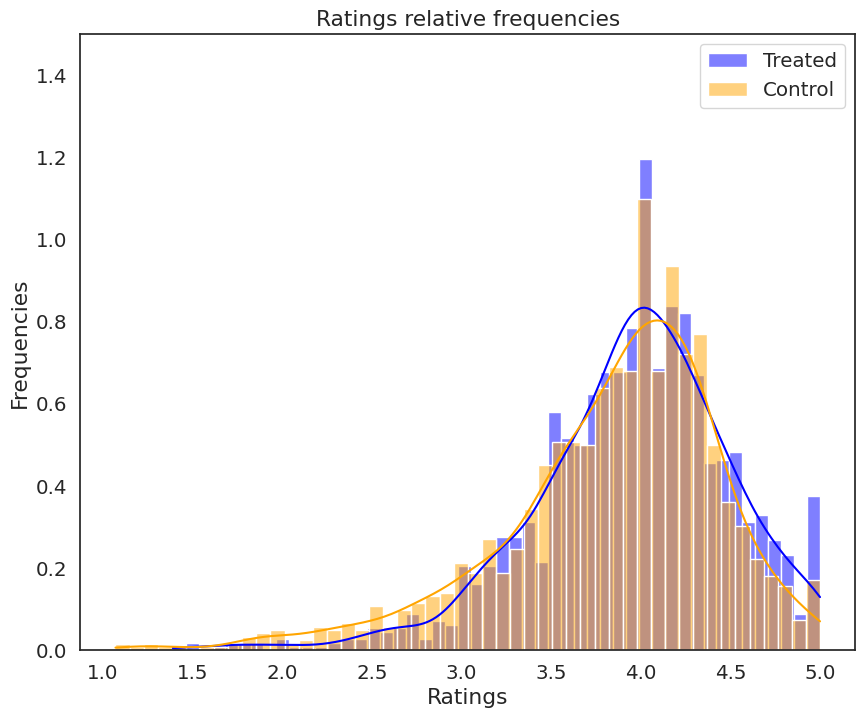

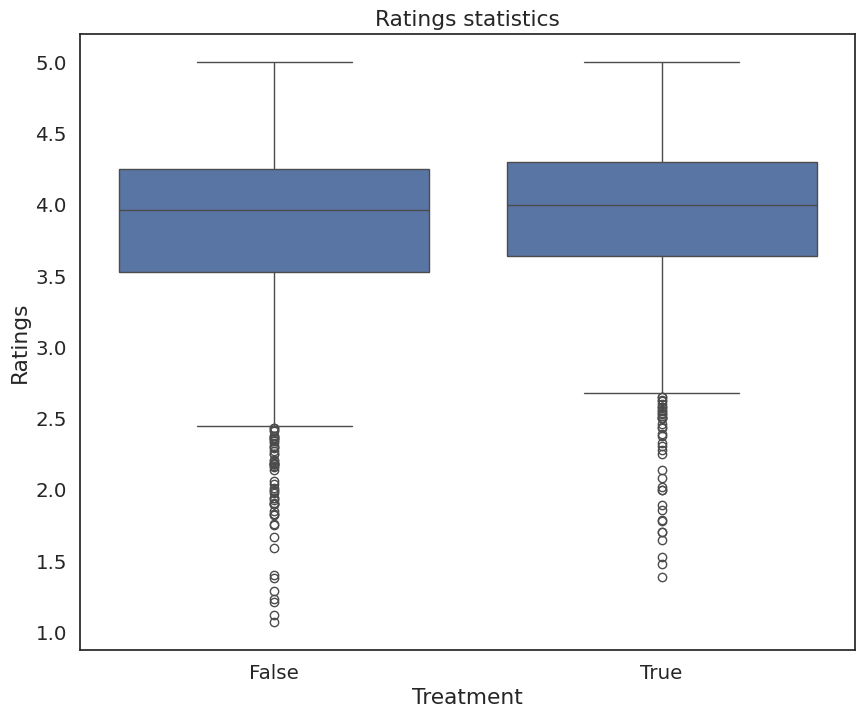

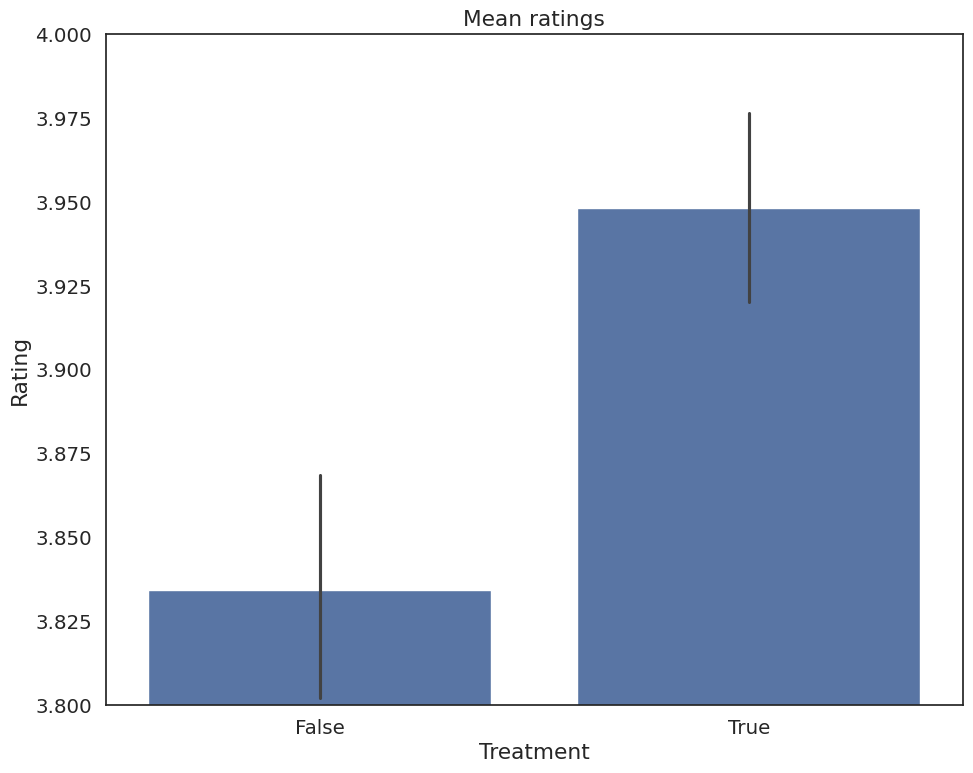

In [49]:
cb.compare_control_and_treatment(df_balanced_ba)

As before the matching, results show slightly higher ratings for domestic ratings.

Let's do a t-test to see if there is a significant difference between the control and treatment groups mean ratings.

In [50]:
# The distributions are more or less normal, and we suppose they are independent so we can use the two samples t-test
# H0: There is no significant difference between domestic and international ratings
# H1: There is a significant difference between domestic and international ratings
df_treatment_ba = df_balanced_ba[df_balanced_ba['domestic_rating'] == True]
df_control_ba = df_balanced_ba[df_balanced_ba['domestic_rating'] == False]

p_value = ttest_ind(df_treatment_ba['rating'], df_control_ba['rating']).pvalue
print(f'P-value: {p_value}')

# If the p-value is smaller than significance level 5% we reject H0
if p_value < 0.05:
    print("There is a significant difference between domestic and international ratings")
else:
    print("There is no significant difference between domestic and international ratings")

P-value: 7.372279219598714e-08
There is a significant difference between domestic and international ratings


We see that there is indeed a significant difference between the control and treated group ratings.

Now let's repeat the experiments on RateBeer's dataset.

As before, we load the data and keep relevant columns.

In [24]:
df_ratings_rb, df_users_rb, df_breweries_rb, df_beers_rb = cb.load_country_data(beer_advocate=False)

Keep 6,947,090 ratings out of 7,122,074 (97.54%)
Keep 50,592 users out of 70,174 (72.10%)
Keep 24,189 breweries out of 24,189 (100.00%)
Keep 442,081 beers out of 442,081 (100.00%)


In [25]:
df_merged_rb = cb.merge_country_data(df_ratings_rb, df_users_rb, df_breweries_rb, df_beers_rb)

There are 1,880,681 domestic ratings vs 4,867,310 international ratings


We have kept most of the ratings as there was few nan values.

Let's do again some regression analysis.

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                 4.588e+05
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:18:53   Log-Likelihood:            -6.3437e+06
No. Observations:             6747991   AIC:                         1.269e+07
Df Residuals:                 6747987   BIC:                         1.269e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

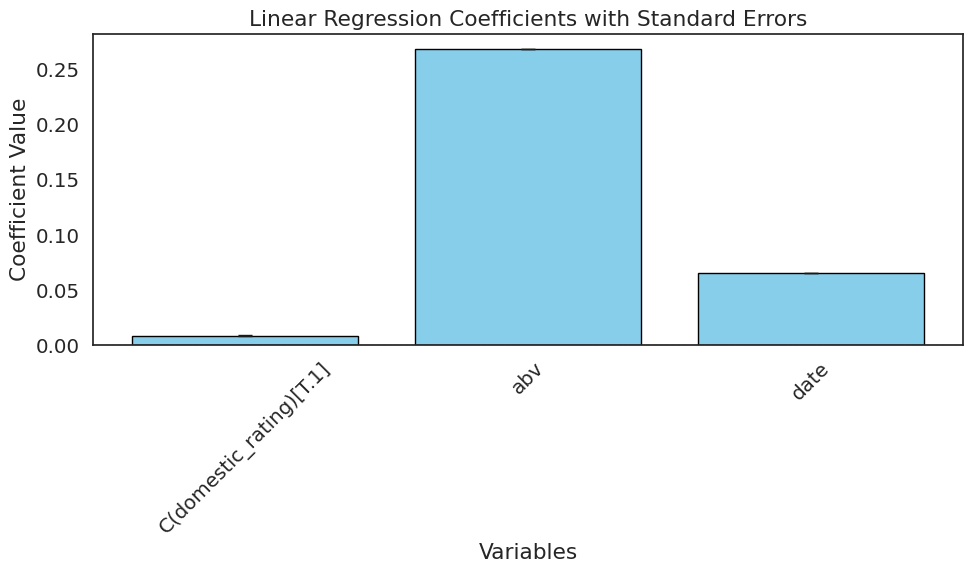

In [26]:
cb.regression_analysis(df_merged_rb, beer_advocate=False)

All coefficients are significant but this time we see that domestic ratings have way less influence than the other variables.

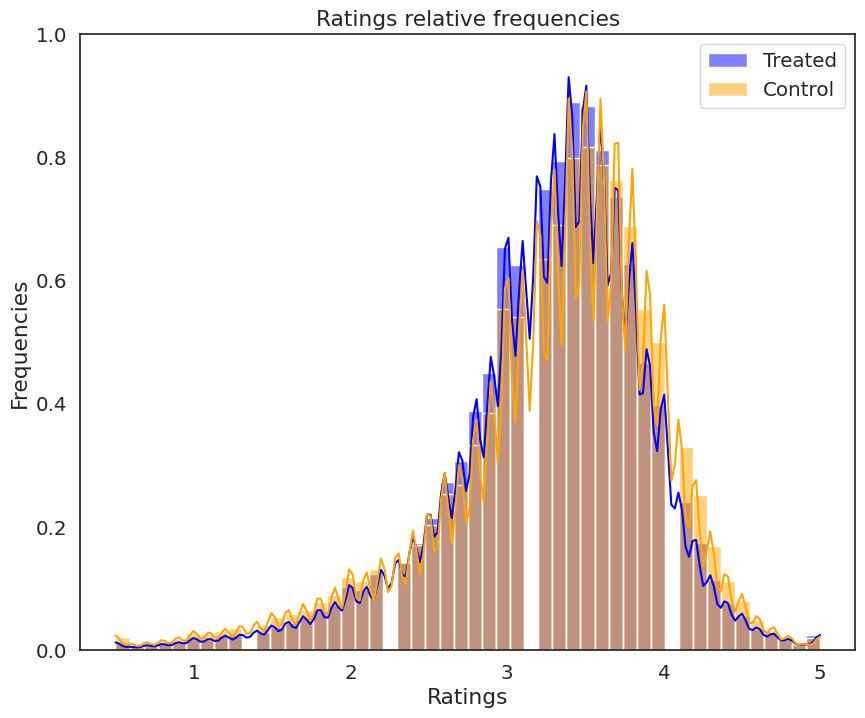

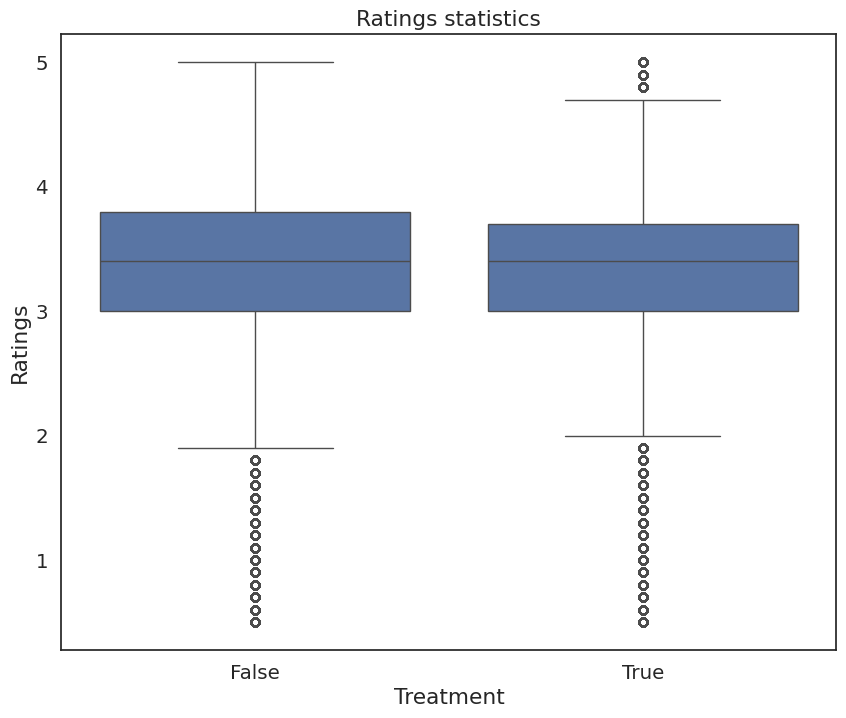

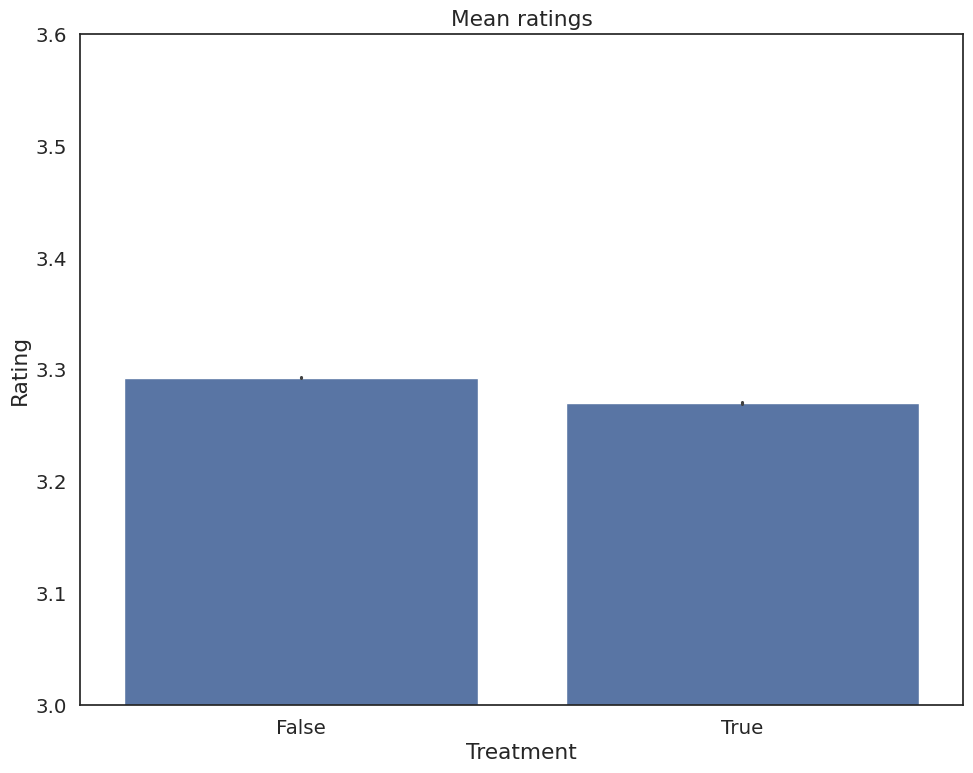

In [27]:
cb.compare_control_and_treatment(df_merged_rb, beer_advocate=False)

We see on the plots that this time, the control group seems to have higher ratings (even though the difference is very small). But we'll still need to see after matching.

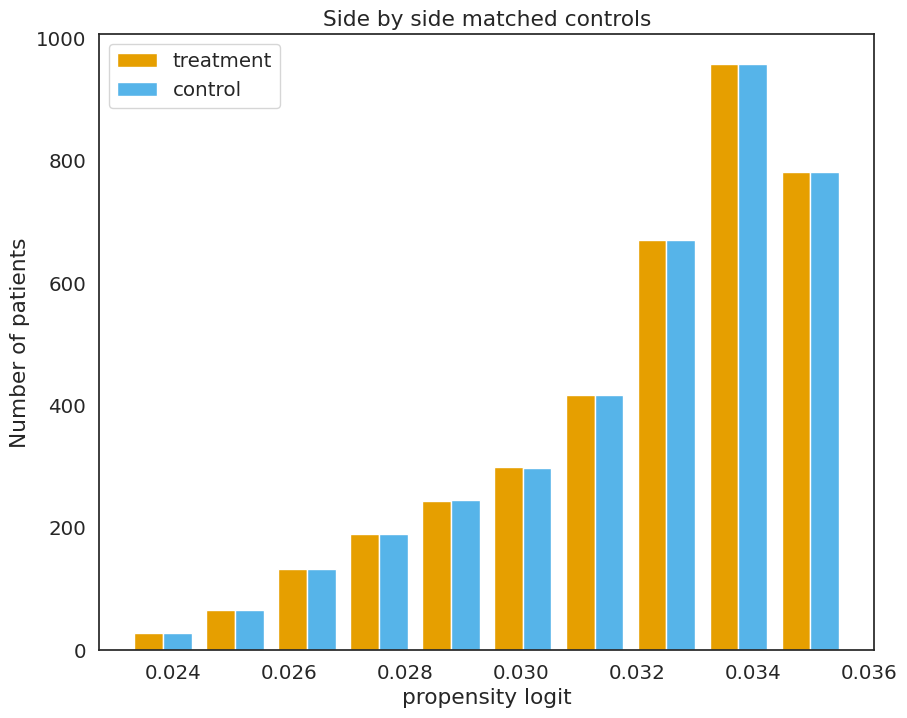

In [28]:
df_balanced_rb = cb.psm_balancing(df_merged_rb, frac_kept=1.0/500.0)

The matching seems good again

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     511.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          1.23e-302
Time:                        17:28:15   Log-Likelihood:                -6703.6
No. Observations:                7574   AIC:                         1.342e+04
Df Residuals:                    7570   BIC:                         1.344e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

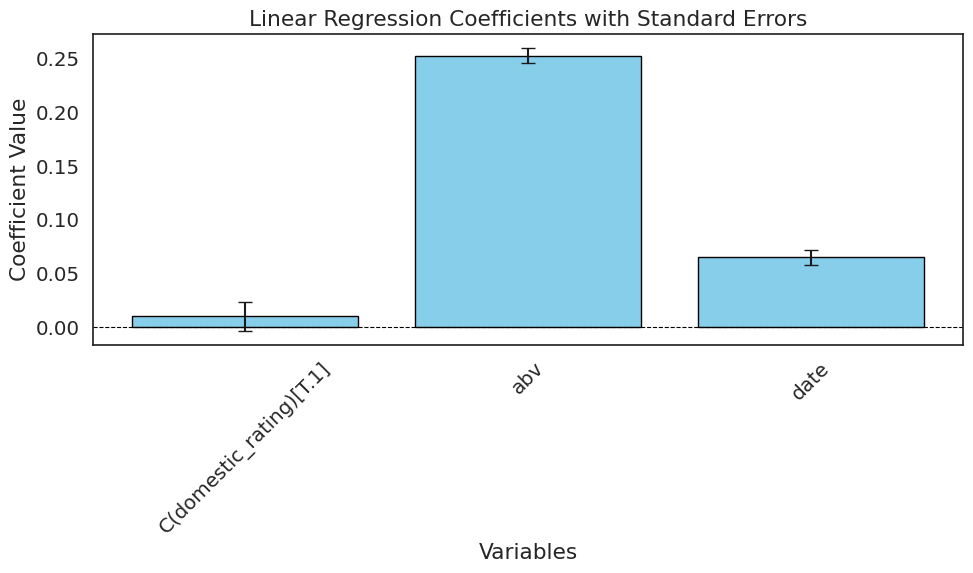

In [29]:
cb.regression_analysis(df_balanced_rb, beer_advocate=False)

This time the domestic rating has a small negative effect. 

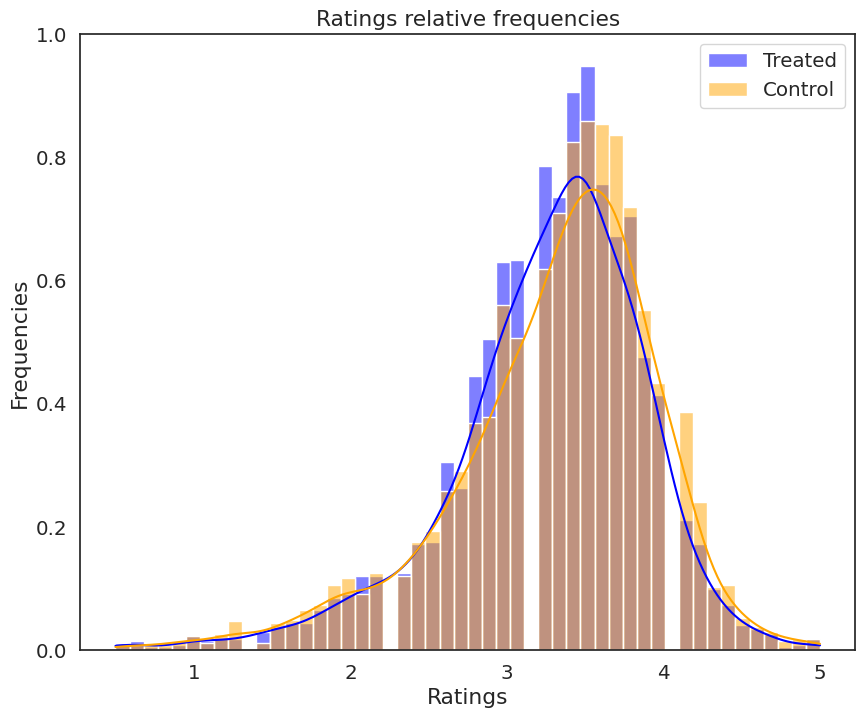

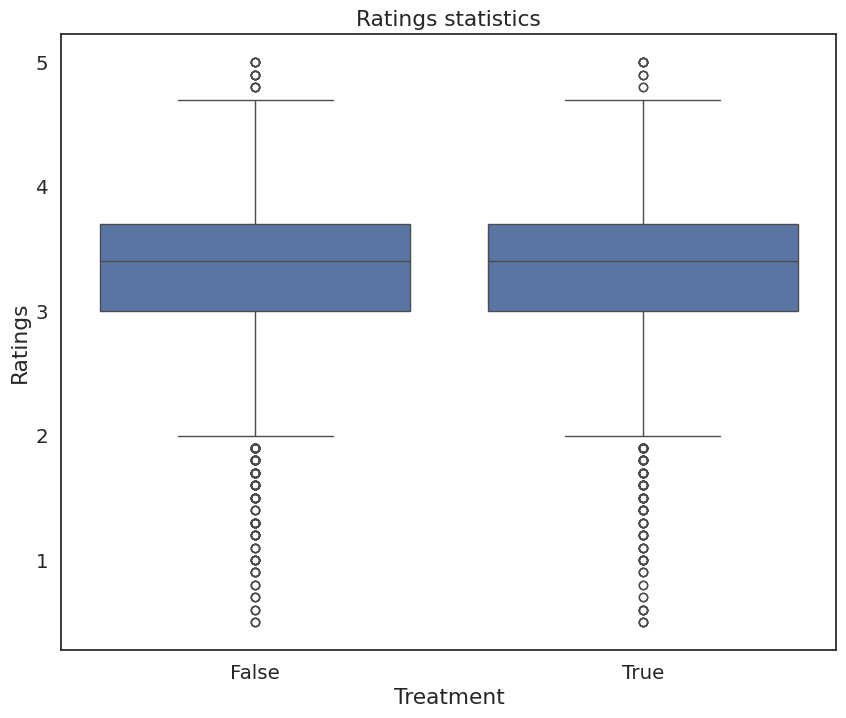

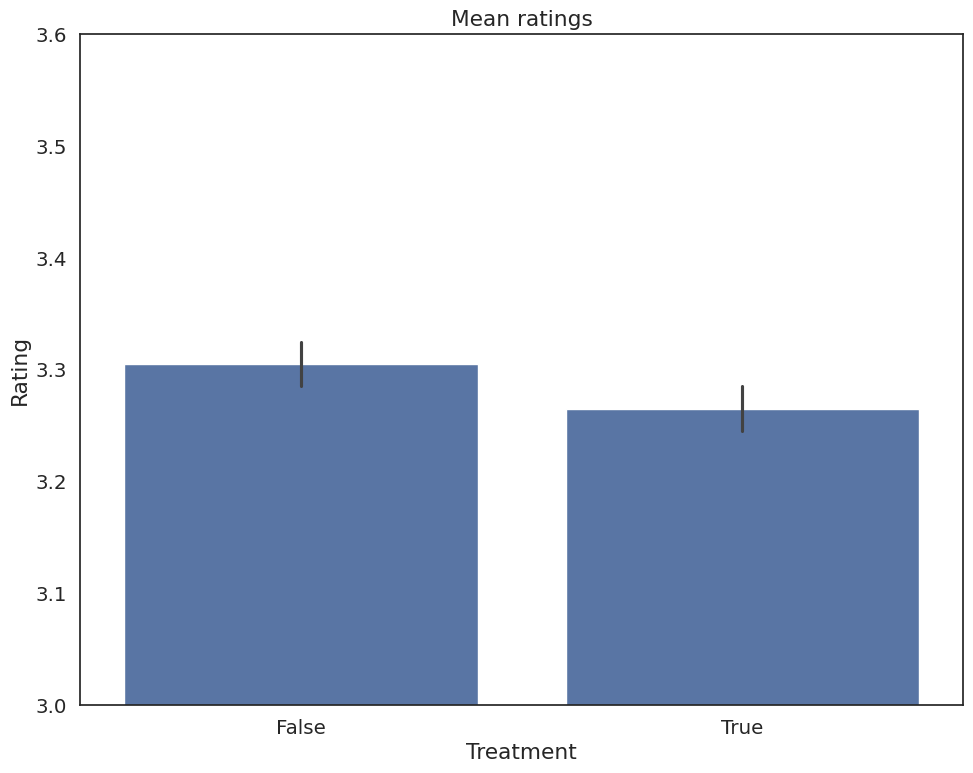

In [30]:
cb.compare_control_and_treatment(df_balanced_rb, beer_advocate=False)

The results didn't change much after matching except for the domestic rating coefficient which is now negative.

In [31]:
# The distributions are more or less normal, and we suppose they are independent so we can use the two samples t-test
# H0: There is no significant difference between domestic and international ratings
# H1: There is a significant difference between domestic and international ratings
df_treatment_rb = df_balanced_rb[df_balanced_rb['domestic_rating'] == True]
df_control_rb = df_balanced_rb[df_balanced_rb['domestic_rating'] == False]

p_value = ttest_ind(df_treatment_rb['rating'], df_control_rb['rating']).pvalue
print(f'P-value: {p_value}')

# If the p-value is smaller than significance level 5% we reject H0
if p_value < 0.05:
    print("There is a significant difference between domestic and international ratings")
else:
    print("There is no significant difference between domestic and international ratings")

P-value: 0.006529215576796149
There is a significant difference between domestic and international ratings


The results on this dataset would suggest domestic ratings are lower than international ratings which is the inverse that we find on the BeerAdvocate which is quite surprising. We conclude that there is probably no effect of coming from the same country as the beer on the ratings.

Finally, let's quickly investigate if there is a correlation between beer consumption and the mean rating in a country.

We first load and merge the additional dataset to the BeerAdvocate and RateBeer datasets.

In [32]:
df_beer_consm_ba = cb.load_beer_consumption_data('data', beer_advocate=True)
df_beer_consm_rb = cb.load_beer_consumption_data('data', beer_advocate=False)

Keep 1,169,810 breweries out of 1,169,810 (100.00%)
Keep 1,631,393 breweries out of 1,631,393 (100.00%)


We compute the Pearson and Spearman correlation coefficients for both BeerAdvocate and RateBeer. 

In [33]:
print(pearsonr(df_beer_consm_ba['rating'], df_beer_consm_ba['beer_consumption_per_capita']))
print(spearmanr(df_beer_consm_ba['rating'], df_beer_consm_ba['beer_consumption_per_capita']))

PearsonRResult(statistic=0.18616657196861797, pvalue=0.023484876198849224)
SignificanceResult(statistic=0.190784675923698, pvalue=0.020195653589314376)


In [34]:
print(pearsonr(df_beer_consm_rb['rating'], df_beer_consm_rb['beer_consumption_per_capita']))
print(spearmanr(df_beer_consm_rb['rating'], df_beer_consm_rb['beer_consumption_per_capita']))

PearsonRResult(statistic=0.0870288211329491, pvalue=0.2979349898993427)
SignificanceResult(statistic=-0.004597701149425287, pvalue=0.9562302698554669)


We see a small significant correlation for BeerAdvocate but not for RateBeer so there might also not be a significant link between beer consumption and the ratings.

## Influence of Beer Names on Ratings

### Data Loading

In [35]:
from src.utils.data_utils import load_name_keyword_data

# Path to beers csv file
data_path = "data/BeerAdvocate/"
rated_beers = load_name_keyword_data(data_path)

### Evaluating the Importance of Specific Keywords in Beer Naming

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from src.utils.data_utils import convert_name_to_stemmed_keywords

# Import useful nltk packages
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("stopwords")

# Define word stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Add keywords column with stemmed keywords for each beer name
rated_beers["keywords"] = rated_beers["beer_name"].apply(convert_name_to_stemmed_keywords)

[nltk_data] Downloading package punkt_tab to /home/yann/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/yann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Find the number, average, standard deviation, minimum and maximum beer ratings for each keyword
exploded_keywords = rated_beers.explode("keywords")
keyword_ratings = exploded_keywords.groupby("keywords")["avg"].agg(["mean", "count", "std", "min", "max"]).reset_index()

# Keep only keywords which are common and significant (>= 100 beers with keyword)
significant_keywords = keyword_ratings[keyword_ratings["count"] >= 100]

In [39]:
# Display 10 most positively significant keywords
ten_best = significant_keywords.nlargest(10, "mean")
ten_best

,keywords,mean,count,std,min,max
24475,w,4.150929,140,0.368165,2.19,4.84
3188,blend,4.144384,146,0.334802,2.62,4.86
430,2016,4.108108,148,0.317328,2.99,4.87
15491,mosaic,4.094598,174,0.259879,2.83,4.78
9268,galaxi,4.094586,133,0.242529,3.35,4.56
2643,bean,4.085391,128,0.334089,3.05,4.77
3677,brandi,4.076615,130,0.384104,2.51,4.80
20863,simco,4.073220,118,0.258344,3.15,4.67
12400,juic,4.072736,106,0.303602,3.36,4.83
1183,age,4.056598,1746,0.322567,2.17,4.90


In [40]:
# Display 10 most negatively significant keywords
ten_worst = significant_keywords.nsmallest(10, "mean")
ten_worst

,keywords,mean,count,std,min,max
13725,light,2.964534,311,0.696015,1.50,4.52
18197,premium,3.105729,288,0.464278,1.84,4.16
17701,pilsen,3.236937,111,0.432113,2.00,4.04
8108,export,3.338774,106,0.545017,2.11,4.40
14376,malt,3.373365,104,0.675532,1.49,4.87
13302,lager,3.405871,1390,0.450432,1.58,4.35
1462,amber,3.465235,596,0.330099,1.38,4.36
20051,saranac,3.508545,110,0.259424,2.80,4.41
16773,origin,3.518962,183,0.464663,2.09,4.51
3235,blond,3.523381,698,0.357753,2.03,4.82


In [41]:
# T-test to confirm significant differences between most polarizing keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: "w" in x)]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: "light" in x)]["avg"]

In [42]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(18.952795915475715, 2.965913416175236e-59)

In [43]:
# T-test to confirm less or no differences between similarly ranked keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: "w" in x)]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: "blend" in x)]["avg"]

In [44]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(0.18638182347893084, 0.8522788779103688)

In [45]:
# T-test between beers with any of the top 10 rated keywords vs top 10 worst rated keywords
with_keyword_1 = rated_beers[rated_beers["keywords"].apply(lambda x: any(keyword in x for keyword in list(ten_best["keywords"])))]["avg"]
with_keyword_2 = rated_beers[rated_beers["keywords"].apply(lambda x: any(keyword in x for keyword in list(ten_worst["keywords"])))]["avg"]

In [46]:
t_stat, p_val = ttest_ind(with_keyword_1, with_keyword_2)
t_stat, p_val

(63.9879409398508, 0.0)